<a href="https://colab.research.google.com/github/reasonj11/Machine-learning/blob/main/4-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
 from sklearn.datasets import fetch_openml
 from sklearn.model_selection import train_test_split
 from sklearn import tree
 from sklearn.ensemble import RandomForestClassifier
 from sklearn.metrics import accuracy_score
 from sklearn.model_selection import GridSearchCV
 import matplotlib.pyplot as plt
 import numpy as np
 import pandas as pd
 import seaborn as sns

In [4]:
 mnist= fetch_openml('mnist_784')
 mnist_data= mnist.data[:10000]
 mnist_target= mnist.target[:10000]
 print(mnist_data)
 print(mnist_data.shape)
 print(mnist_target)
 print(mnist_target.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


      pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
9995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
9996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
9997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
9998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
9999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

      pixel10  ...  pixel775  pixel776 

In [5]:
X_train,X_test,y_train,y_test=train_test_split(mnist.data,
                                              mnist.target,
                                              test_size=0.2)

In [7]:
dt_clf= tree.DecisionTreeClassifier()
rf_clf= RandomForestClassifier()

dt_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

dt_pred= dt_clf.predict(X_test)
rf_pred= rf_clf.predict(X_test)

accuracy_dt= accuracy_score(y_test, dt_pred)
accuracy_rf= accuracy_score(y_test, rf_pred)

In [8]:
 print('의사결정트리예측정확도: {0:.4f}'.format(accuracy_dt))
 print('랜덤포레스트예측정확도: {0:.4f}'.format(accuracy_rf))

의사결정트리예측정확도: 0.8751
랜덤포레스트예측정확도: 0.9685


In [ ]:
print(rf_clf)

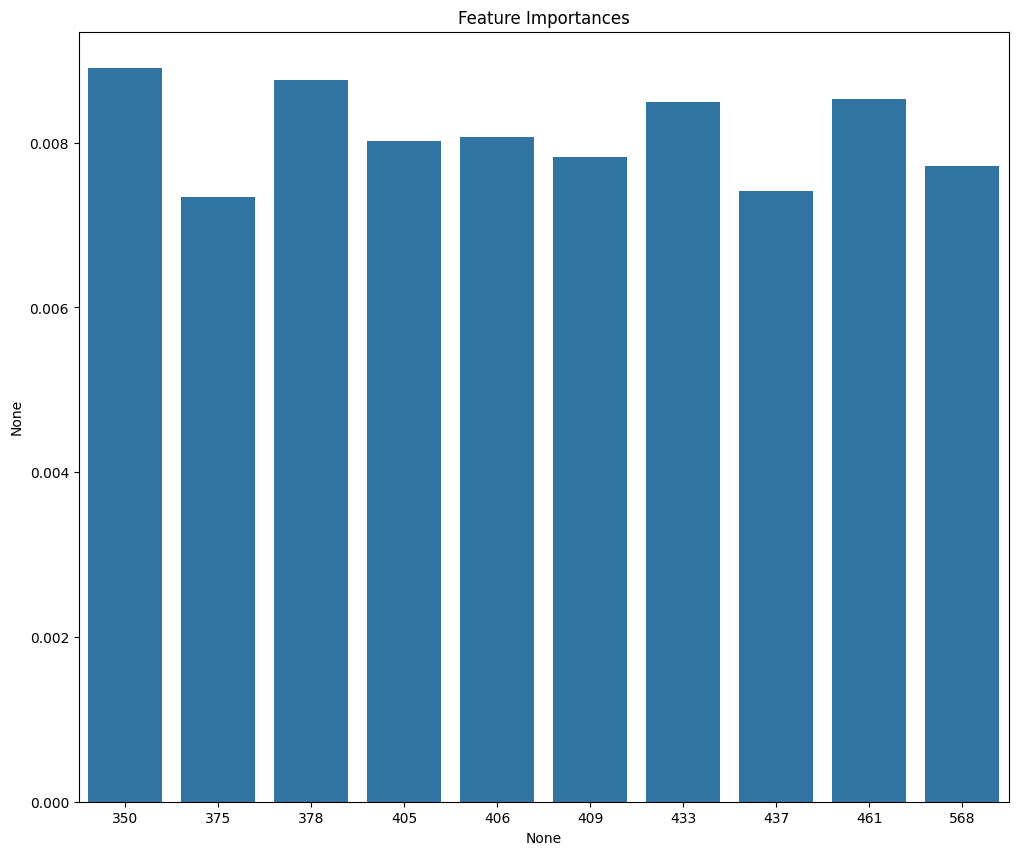

In [10]:
 ft_importances_values= rf_clf.feature_importances_
 ft_importances= pd.Series(ft_importances_values)
 top10 = ft_importances.sort_values(ascending=False)[:10]
 plt.figure(figsize=(12,10))
 plt.title('Feature Importances')
 sns.barplot(x=top10.index, y=top10)
 plt.show()

In [ ]:
rf_param_grid={
    'n_estimators' : [100, 110, 120],
    'min_samples_leaf' : [1, 2, 3],
    'min_samples_split' : [2, 3, 4]
    }
rf_clf= RandomForestClassifier(random_state= 0)
grid = GridSearchCV(rf_clf, param_grid= rf_param_grid, scoring='accuracy', n_jobs=1)

grid.fit(X_train, y_train)

In [ ]:
print('최고평균정확도: {0:.4f}'.format(grid.best_score_))
print(grid.best_params_)